In [3]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt

In [2]:
!pip install mlxtend

     ---------------------------------------- 1.3/1.3 MB 12.1 MB/s eta 0:00:00


In [4]:
##############################
##  데이터셋 임의 제작
################################

dataset=[['사과','치즈','생수'],
               ['생수','호두','치즈','고등어'],
               ['수박','사과','생수'],
               ['생수','호두','치즈','옥수수']]
import numpy as np
np.shape(dataset)

C:\Users\user\.conda\envs\han\lib\site-packages\numpy\core\fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(4,)

# 방법1

In [5]:
te = TransactionEncoder()

In [6]:
te

TransactionEncoder()

In [7]:
te.fit(dataset)

TransactionEncoder()

In [8]:
te.columns_

['고등어', '사과', '생수', '수박', '옥수수', '치즈', '호두']

In [9]:
te.transform(dataset)

array([[False,  True,  True, False, False,  True, False],
       [ True, False,  True, False, False,  True,  True],
       [False,  True,  True,  True, False, False, False],
       [False, False,  True, False,  True,  True,  True]])

In [10]:
te_arry = pd.DataFrame(te.transform(dataset), columns=te.columns_)

In [11]:
te_arry

,고등어,사과,생수,수박,옥수수,치즈,호두
0,False,True,True,False,False,True,False
1,True,False,True,False,False,True,True
2,False,True,True,True,False,False,False
3,False,False,True,False,True,True,True


# 방법2

In [12]:
te = TransactionEncoder()
te_arry = te.fit(dataset).transform(dataset)

In [13]:
print(te_arry)

[[False  True  True False False  True False]
 [ True False  True False False  True  True]
 [False  True  True  True False False False]
 [False False  True False  True  True  True]]


In [14]:
df = pd.DataFrame(te_arry, columns=te.columns_)
df

,고등어,사과,생수,수박,옥수수,치즈,호두
0,False,True,True,False,False,True,False
1,True,False,True,False,False,True,True
2,False,True,True,True,False,False,False
3,False,False,True,False,True,True,True


# 중복도 연산 되는데 set해서 들어오는게 좋음

In [15]:
##############################
##  데이터셋 임의 제작
################################

dataset=[['사과','치즈','생수', '사과', '사과'],
               ['생수','호두','치즈','고등어'],
               ['수박','사과','생수'],
               ['생수','호두','치즈','옥수수']]
import numpy as np
np.shape(dataset)

te = TransactionEncoder()
te_arry = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_arry, columns=te.columns_)
df

C:\Users\user\.conda\envs\han\lib\site-packages\numpy\core\fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


,고등어,사과,생수,수박,옥수수,치즈,호두
0,False,True,True,False,False,True,False
1,True,False,True,False,False,True,True
2,False,True,True,True,False,False,False
3,False,False,True,False,True,True,True


# 지지도 계산

In [17]:
frequency_itemsets = apriori(df, use_colnames=True)
frequency_itemsets

,support,itemsets
0,0.50,(사과)
1,1.00,(생수)
2,0.75,(치즈)
3,0.50,(호두)
4,0.50,"(사과, 생수)"
5,0.75,"(치즈, 생수)"
6,0.50,"(호두, 생수)"
7,0.50,"(치즈, 호두)"
8,0.50,"(치즈, 호두, 생수)"


In [19]:
frequency_itemsets = apriori(df, use_colnames=True, min_support=0.01)
frequency_itemsets

,support,itemsets
0,0.25,(고등어)
1,0.50,(사과)
2,1.00,(생수)
3,0.25,(수박)
4,0.25,(옥수수)
5,0.75,(치즈)
6,0.50,(호두)
7,0.25,"(고등어, 생수)"
8,0.25,"(치즈, 고등어)"
9,0.25,"(고등어, 호두)"


In [20]:
type(frequency_itemsets)

pandas.core.frame.DataFrame

In [24]:
frequency_itemsets.sort_values('support', ascending=False).head(5)

,support,itemsets
2,1.00,(생수)
15,0.75,"(치즈, 생수)"
5,0.75,(치즈)
16,0.50,"(호두, 생수)"
1,0.50,(사과)


In [25]:
# 추가 삭제가 안되는 집합: frozenset
frequency_itemsets['itemsets'][0]

frozenset({'고등어'})

In [28]:
len(frequency_itemsets['itemsets'][2])

1

In [27]:
len(frequency_itemsets['itemsets'][15])

2

In [31]:
# map(): 시리즈만 가능
# apply(): 데이터프레임, 시리즈 가능
frequency_itemsets['itemsets'].apply(lambda x: len(x))

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     2
8     2
9     2
10    2
11    2
12    2
13    2
14    2
15    2
16    2
17    2
18    2
19    2
20    3
21    3
22    3
23    3
24    3
25    3
26    3
27    3
28    3
29    4
30    4
Name: itemsets, dtype: int64

In [32]:
frequency_itemsets['length'] = frequency_itemsets['itemsets'].apply(lambda x: len(x))

In [33]:
frequency_itemsets

,support,itemsets,length
0,0.25,(고등어),1
1,0.50,(사과),1
2,1.00,(생수),1
3,0.25,(수박),1
4,0.25,(옥수수),1
5,0.75,(치즈),1
6,0.50,(호두),1
7,0.25,"(고등어, 생수)",2
8,0.25,"(치즈, 고등어)",2
9,0.25,"(고등어, 호두)",2


In [34]:
frequency_itemsets[frequency_itemsets['length'] >= 2]

,support,itemsets,length
7,0.25,"(고등어, 생수)",2
8,0.25,"(치즈, 고등어)",2
9,0.25,"(고등어, 호두)",2
10,0.50,"(사과, 생수)",2
11,0.25,"(사과, 수박)",2
12,0.25,"(사과, 치즈)",2
13,0.25,"(수박, 생수)",2
14,0.25,"(옥수수, 생수)",2
15,0.75,"(치즈, 생수)",2
16,0.50,"(호두, 생수)",2


In [35]:
frequency_itemsets[frequency_itemsets['length'] >= 2].sort_values('support', ascending=False)

,support,itemsets,length
15,0.75,"(치즈, 생수)",2
19,0.50,"(치즈, 호두)",2
10,0.50,"(사과, 생수)",2
27,0.50,"(치즈, 호두, 생수)",3
16,0.50,"(호두, 생수)",2
21,0.25,"(고등어, 호두, 생수)",3
29,0.25,"(치즈, 고등어, 호두, 생수)",4
28,0.25,"(치즈, 옥수수, 호두)",3
26,0.25,"(옥수수, 호두, 생수)",3
25,0.25,"(치즈, 옥수수, 생수)",3


In [37]:
frequency_itemsets.head(10)

,support,itemsets,length
0,0.25,(고등어),1
1,0.50,(사과),1
2,1.00,(생수),1
3,0.25,(수박),1
4,0.25,(옥수수),1
5,0.75,(치즈),1
6,0.50,(호두),1
7,0.25,"(고등어, 생수)",2
8,0.25,"(치즈, 고등어)",2
9,0.25,"(고등어, 호두)",2


In [41]:
frequency_itemsets['itemsets'].apply(lambda x: '사과' in x)

0     False
1      True
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10     True
11     True
12     True
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23     True
24     True
25    False
26    False
27    False
28    False
29    False
30    False
Name: itemsets, dtype: bool

In [42]:
frequency_itemsets[frequency_itemsets['itemsets'].apply(lambda x: '사과' in x)]

,support,itemsets,length
1,0.50,(사과),1
10,0.50,"(사과, 생수)",2
11,0.25,"(사과, 수박)",2
12,0.25,"(사과, 치즈)",2
23,0.25,"(사과, 수박, 생수)",3
24,0.25,"(사과, 치즈, 생수)",3


In [43]:
item = ['치즈', '옥수수']
for i in item:
    display(frequency_itemsets[frequency_itemsets['itemsets'].apply(lambda x: i in x)])

,support,itemsets,length
5,0.75,(치즈),1
8,0.25,"(치즈, 고등어)",2
12,0.25,"(사과, 치즈)",2
15,0.75,"(치즈, 생수)",2
17,0.25,"(치즈, 옥수수)",2
19,0.50,"(치즈, 호두)",2
20,0.25,"(치즈, 고등어, 생수)",3
22,0.25,"(치즈, 고등어, 호두)",3
24,0.25,"(사과, 치즈, 생수)",3
25,0.25,"(치즈, 옥수수, 생수)",3


,support,itemsets,length
4,0.25,(옥수수),1
14,0.25,"(옥수수, 생수)",2
17,0.25,"(치즈, 옥수수)",2
18,0.25,"(옥수수, 호두)",2
25,0.25,"(치즈, 옥수수, 생수)",3
26,0.25,"(옥수수, 호두, 생수)",3
28,0.25,"(치즈, 옥수수, 호두)",3
30,0.25,"(치즈, 옥수수, 호두, 생수)",4


In [48]:
frequency_itemsets[frequency_itemsets['itemsets'].apply(lambda x: ('치즈'and'옥수수') in x)]

,support,itemsets,length
4,0.25,(옥수수),1
14,0.25,"(옥수수, 생수)",2
17,0.25,"(치즈, 옥수수)",2
18,0.25,"(옥수수, 호두)",2
25,0.25,"(치즈, 옥수수, 생수)",3
26,0.25,"(옥수수, 호두, 생수)",3
28,0.25,"(치즈, 옥수수, 호두)",3
30,0.25,"(치즈, 옥수수, 호두, 생수)",4


In [49]:
association_rules(frequency_itemsets, metric='lift', min_threshold=1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(고등어),(생수),0.25,1.00,0.25,1.000000,1.000000,0.0000,inf
1,(생수),(고등어),1.00,0.25,0.25,0.250000,1.000000,0.0000,1.000
2,(치즈),(고등어),0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125
3,(고등어),(치즈),0.25,0.75,0.25,1.000000,1.333333,0.0625,inf
4,(고등어),(호두),0.25,0.50,0.25,1.000000,2.000000,0.1250,inf
...,...,...,...,...,...,...,...,...,...
97,"(호두, 생수)","(치즈, 옥수수)",0.50,0.25,0.25,0.500000,2.000000,0.1250,1.500
98,(치즈),"(옥수수, 호두, 생수)",0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125
99,(옥수수),"(치즈, 호두, 생수)",0.25,0.50,0.25,1.000000,2.000000,0.1250,inf
100,(호두),"(치즈, 옥수수, 생수)",0.50,0.25,0.25,0.500000,2.000000,0.1250,1.500


In [51]:
# metric(confidence) 기준으로 min_threshold(하한선)을 0.1로 잡아서 보여줘
rules = association_rules(frequency_itemsets, metric='confidence', min_threshold=0.1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(고등어),(생수),0.25,1.00,0.25,1.000000,1.000000,0.0000,inf
1,(생수),(고등어),1.00,0.25,0.25,0.250000,1.000000,0.0000,1.000
2,(치즈),(고등어),0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125
3,(고등어),(치즈),0.25,0.75,0.25,1.000000,1.333333,0.0625,inf
4,(고등어),(호두),0.25,0.50,0.25,1.000000,2.000000,0.1250,inf
...,...,...,...,...,...,...,...,...,...
103,"(호두, 생수)","(치즈, 옥수수)",0.50,0.25,0.25,0.500000,2.000000,0.1250,1.500
104,(치즈),"(옥수수, 호두, 생수)",0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125
105,(옥수수),"(치즈, 호두, 생수)",0.25,0.50,0.25,1.000000,2.000000,0.1250,inf
106,(호두),"(치즈, 옥수수, 생수)",0.50,0.25,0.25,0.500000,2.000000,0.1250,1.500


In [52]:
# 2 치즈를 산 사람이 고등어를 살 확률은 0.25(support)
# lift가 1 이상이면 치즈 산 사람이 고등어 살 확률은 0.33 이상
# lift가 1 이하면 반대로 안 살 확률
rules[rules['lift'] > 1.0]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(치즈),(고등어),0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125
3,(고등어),(치즈),0.25,0.75,0.25,1.000000,1.333333,0.0625,inf
4,(고등어),(호두),0.25,0.50,0.25,1.000000,2.000000,0.1250,inf
5,(호두),(고등어),0.50,0.25,0.25,0.500000,2.000000,0.1250,1.500
8,(사과),(수박),0.50,0.25,0.25,0.500000,2.000000,0.1250,1.500
...,...,...,...,...,...,...,...,...,...
102,"(옥수수, 생수)","(치즈, 호두)",0.25,0.50,0.25,1.000000,2.000000,0.1250,inf
103,"(호두, 생수)","(치즈, 옥수수)",0.50,0.25,0.25,0.500000,2.000000,0.1250,1.500
104,(치즈),"(옥수수, 호두, 생수)",0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125
105,(옥수수),"(치즈, 호두, 생수)",0.25,0.50,0.25,1.000000,2.000000,0.1250,inf


In [54]:
rules[rules['antecedents'].apply(lambda x: '사과' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(사과),(생수),0.50,1.00,0.50,1.0,1.000000,0.000,inf
8,(사과),(수박),0.50,0.25,0.25,0.5,2.000000,0.125,1.5
10,(사과),(치즈),0.50,0.75,0.25,0.5,0.666667,-0.125,0.5
44,"(사과, 수박)",(생수),0.25,1.00,0.25,1.0,1.000000,0.000,inf
45,"(사과, 생수)",(수박),0.50,0.25,0.25,0.5,2.000000,0.125,1.5
47,(사과),"(생수, 수박)",0.50,0.25,0.25,0.5,2.000000,0.125,1.5
50,"(사과, 치즈)",(생수),0.25,1.00,0.25,1.0,1.000000,0.000,inf
51,"(사과, 생수)",(치즈),0.50,0.75,0.25,0.5,0.666667,-0.125,0.5
53,(사과),"(치즈, 생수)",0.50,0.75,0.25,0.5,0.666667,-0.125,0.5


In [56]:
rules[rules['consequents'].apply(lambda x: '사과' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,(생수),(사과),1.00,0.50,0.50,0.500000,1.000000,0.000,1.00
9,(수박),(사과),0.25,0.50,0.25,1.000000,2.000000,0.125,inf
11,(치즈),(사과),0.75,0.50,0.25,0.333333,0.666667,-0.125,0.75
46,"(생수, 수박)",(사과),0.25,0.50,0.25,1.000000,2.000000,0.125,inf
48,(수박),"(사과, 생수)",0.25,0.50,0.25,1.000000,2.000000,0.125,inf
49,(생수),"(사과, 수박)",1.00,0.25,0.25,0.250000,1.000000,0.000,1.00
52,"(치즈, 생수)",(사과),0.75,0.50,0.25,0.333333,0.666667,-0.125,0.75
54,(치즈),"(사과, 생수)",0.75,0.50,0.25,0.333333,0.666667,-0.125,0.75
55,(생수),"(사과, 치즈)",1.00,0.25,0.25,0.250000,1.000000,0.000,1.00


In [57]:
con1 = rules['antecedents'].apply(lambda x: '사과' in x)
con2 = rules['consequents'].apply(lambda x: '사과' in x)
rules[con1 | con2]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(사과),(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
7,(생수),(사과),1.00,0.50,0.50,0.500000,1.000000,0.000,1.00
8,(사과),(수박),0.50,0.25,0.25,0.500000,2.000000,0.125,1.50
9,(수박),(사과),0.25,0.50,0.25,1.000000,2.000000,0.125,inf
10,(사과),(치즈),0.50,0.75,0.25,0.500000,0.666667,-0.125,0.50
11,(치즈),(사과),0.75,0.50,0.25,0.333333,0.666667,-0.125,0.75
44,"(사과, 수박)",(생수),0.25,1.00,0.25,1.000000,1.000000,0.000,inf
45,"(사과, 생수)",(수박),0.50,0.25,0.25,0.500000,2.000000,0.125,1.50
46,"(생수, 수박)",(사과),0.25,0.50,0.25,1.000000,2.000000,0.125,inf
47,(사과),"(생수, 수박)",0.50,0.25,0.25,0.500000,2.000000,0.125,1.50


In [58]:
rules[con1 & con2]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [60]:
rules[rules['antecedents'].apply(lambda x: '사과' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(사과),(생수),0.50,1.00,0.50,1.0,1.000000,0.000,inf
8,(사과),(수박),0.50,0.25,0.25,0.5,2.000000,0.125,1.5
10,(사과),(치즈),0.50,0.75,0.25,0.5,0.666667,-0.125,0.5
44,"(사과, 수박)",(생수),0.25,1.00,0.25,1.0,1.000000,0.000,inf
45,"(사과, 생수)",(수박),0.50,0.25,0.25,0.5,2.000000,0.125,1.5
47,(사과),"(생수, 수박)",0.50,0.25,0.25,0.5,2.000000,0.125,1.5
50,"(사과, 치즈)",(생수),0.25,1.00,0.25,1.0,1.000000,0.000,inf
51,"(사과, 생수)",(치즈),0.50,0.75,0.25,0.5,0.666667,-0.125,0.5
53,(사과),"(치즈, 생수)",0.50,0.75,0.25,0.5,0.666667,-0.125,0.5


In [62]:
rules[rules['antecedents'].apply(lambda x: '사과' in x)].sort_values('lift', ascending=False).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(사과),(수박),0.50,0.25,0.25,0.5,2.0,0.125,1.5
45,"(사과, 생수)",(수박),0.50,0.25,0.25,0.5,2.0,0.125,1.5
47,(사과),"(생수, 수박)",0.50,0.25,0.25,0.5,2.0,0.125,1.5
6,(사과),(생수),0.50,1.00,0.50,1.0,1.0,0.000,inf
44,"(사과, 수박)",(생수),0.25,1.00,0.25,1.0,1.0,0.000,inf


In [63]:
te.columns_

['고등어', '사과', '생수', '수박', '옥수수', '치즈', '호두']

In [65]:
for i in te.columns_:
    display(rules[rules['antecedents'].apply(lambda x: i in x)].sort_values('lift', ascending=False).head(5))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
38,"(치즈, 고등어)",(호두),0.25,0.5,0.25,1.0,2.0,0.125,inf
33,"(고등어, 생수)",(호두),0.25,0.5,0.25,1.0,2.0,0.125,inf
88,"(고등어, 생수)","(치즈, 호두)",0.25,0.5,0.25,1.0,2.0,0.125,inf
84,"(치즈, 고등어)","(호두, 생수)",0.25,0.5,0.25,1.0,2.0,0.125,inf
81,"(치즈, 고등어, 생수)",(호두),0.25,0.5,0.25,1.0,2.0,0.125,inf


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(사과),(수박),0.50,0.25,0.25,0.5,2.0,0.125,1.5
45,"(사과, 생수)",(수박),0.50,0.25,0.25,0.5,2.0,0.125,1.5
47,(사과),"(생수, 수박)",0.50,0.25,0.25,0.5,2.0,0.125,1.5
6,(사과),(생수),0.50,1.00,0.50,1.0,1.0,0.000,inf
44,"(사과, 수박)",(생수),0.25,1.00,0.25,1.0,1.0,0.000,inf


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
46,"(생수, 수박)",(사과),0.25,0.50,0.25,1.0,2.0,0.125,inf
96,"(치즈, 호두, 생수)",(옥수수),0.50,0.25,0.25,0.5,2.0,0.125,1.5
88,"(고등어, 생수)","(치즈, 호두)",0.25,0.50,0.25,1.0,2.0,0.125,inf
89,"(호두, 생수)","(치즈, 고등어)",0.50,0.25,0.25,0.5,2.0,0.125,1.5
81,"(치즈, 고등어, 생수)",(호두),0.25,0.50,0.25,1.0,2.0,0.125,inf


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,(수박),(사과),0.25,0.5,0.25,1.0,2.0,0.125,inf
46,"(생수, 수박)",(사과),0.25,0.5,0.25,1.0,2.0,0.125,inf
48,(수박),"(사과, 생수)",0.25,0.5,0.25,1.0,2.0,0.125,inf
12,(수박),(생수),0.25,1.0,0.25,1.0,1.0,0.000,inf
44,"(사과, 수박)",(생수),0.25,1.0,0.25,1.0,1.0,0.000,inf


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
74,"(치즈, 옥수수)",(호두),0.25,0.5,0.25,1.0,2.0,0.125,inf
63,"(옥수수, 생수)",(호두),0.25,0.5,0.25,1.0,2.0,0.125,inf
102,"(옥수수, 생수)","(치즈, 호두)",0.25,0.5,0.25,1.0,2.0,0.125,inf
98,"(치즈, 옥수수)","(호두, 생수)",0.25,0.5,0.25,1.0,2.0,0.125,inf
95,"(치즈, 옥수수, 생수)",(호두),0.25,0.5,0.25,1.0,2.0,0.125,inf


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
39,"(치즈, 호두)",(고등어),0.50,0.25,0.25,0.5,2.0,0.125,1.5
38,"(치즈, 고등어)",(호두),0.25,0.50,0.25,1.0,2.0,0.125,inf
75,"(치즈, 호두)",(옥수수),0.50,0.25,0.25,0.5,2.0,0.125,1.5
81,"(치즈, 고등어, 생수)",(호두),0.25,0.50,0.25,1.0,2.0,0.125,inf
82,"(치즈, 호두, 생수)",(고등어),0.50,0.25,0.25,0.5,2.0,0.125,1.5


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(호두),(고등어),0.5,0.25,0.25,0.5,2.0,0.125,1.5
64,"(호두, 생수)",(옥수수),0.5,0.25,0.25,0.5,2.0,0.125,1.5
103,"(호두, 생수)","(치즈, 옥수수)",0.5,0.25,0.25,0.5,2.0,0.125,1.5
99,"(치즈, 호두)","(옥수수, 생수)",0.5,0.25,0.25,0.5,2.0,0.125,1.5
96,"(치즈, 호두, 생수)",(옥수수),0.5,0.25,0.25,0.5,2.0,0.125,1.5


In [67]:
for i in te.columns_:
    tmp = rules[rules['antecedents'].apply(lambda x: i in x)].sort_values('lift', ascending=False).head(5)
    tmp.to_csv(f'./{i}.csv', encoding='euc-kr')

# 방법2

In [68]:
!pip install apyori

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=3328d09b73eaa1902ea34fb42be26c2c6708792a06b59a28d2ab8beef55ad4f4
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\c4\1a\79\20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [69]:
from apyori import apriori

In [70]:
dataset=[['사과','치즈','생수'],
               ['생수','호두','치즈','고등어'],
               ['수박','사과','생수'],
               ['생수','호두','치즈','옥수수']]

In [71]:
apriori(dataset)

<generator object apriori at 0x0000019BFAE73760>

In [72]:
list(apriori(dataset))

[RelationRecord(items=frozenset({'고등어'}), support=0.25, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'고등어'}), confidence=0.25, lift=1.0)]),
 RelationRecord(items=frozenset({'사과'}), support=0.5, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'사과'}), confidence=0.5, lift=1.0)]),
 RelationRecord(items=frozenset({'생수'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'생수'}), confidence=1.0, lift=1.0)]),
 RelationRecord(items=frozenset({'수박'}), support=0.25, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'수박'}), confidence=0.25, lift=1.0)]),
 RelationRecord(items=frozenset({'옥수수'}), support=0.25, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'옥수수'}), confidence=0.25, lift=1.0)]),
 RelationRecord(items=frozenset({'치즈'}), support=0.75, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add

In [80]:
df = pd.DataFrame(list(apriori(dataset)))
df

,items,support,ordered_statistics
0,(고등어),0.25,"[((), (고등어), 0.25, 1.0)]"
1,(사과),0.50,"[((), (사과), 0.5, 1.0)]"
2,(생수),1.00,"[((), (생수), 1.0, 1.0)]"
3,(수박),0.25,"[((), (수박), 0.25, 1.0)]"
4,(옥수수),0.25,"[((), (옥수수), 0.25, 1.0)]"
5,(치즈),0.75,"[((), (치즈), 0.75, 1.0)]"
6,(호두),0.50,"[((), (호두), 0.5, 1.0)]"
7,"(고등어, 생수)",0.25,"[((), (고등어, 생수), 0.25, 1.0), ((고등어), (생수), 1.0..."
8,"(치즈, 고등어)",0.25,"[((), (치즈, 고등어), 0.25, 1.0), ((고등어), (치즈), 1.0..."
9,"(고등어, 호두)",0.25,"[((), (고등어, 호두), 0.25, 1.0), ((고등어), (호두), 1.0..."


In [75]:
pd.DataFrame(list(apriori(dataset, min_support=0.5)))

,items,support,ordered_statistics
0,(사과),0.50,"[((), (사과), 0.5, 1.0)]"
1,(생수),1.00,"[((), (생수), 1.0, 1.0)]"
2,(치즈),0.75,"[((), (치즈), 0.75, 1.0)]"
3,(호두),0.50,"[((), (호두), 0.5, 1.0)]"
4,"(사과, 생수)",0.50,"[((), (사과, 생수), 0.5, 1.0), ((사과), (생수), 1.0, 1..."
5,"(치즈, 생수)",0.75,"[((), (치즈, 생수), 0.75, 1.0), ((생수), (치즈), 0.75,..."
6,"(호두, 생수)",0.50,"[((), (호두, 생수), 0.5, 1.0), ((생수), (호두), 0.5, 1..."
7,"(치즈, 호두)",0.50,"[((), (치즈, 호두), 0.5, 1.0), ((치즈), (호두), 0.6666..."
8,"(치즈, 호두, 생수)",0.50,"[((), (치즈, 호두, 생수), 0.5, 1.0), ((생수), (치즈, 호두)..."


In [76]:
df['items'].apply(lambda x: len(x))

0    1
1    1
2    1
3    1
4    2
5    2
6    2
7    2
8    3
Name: items, dtype: int64

In [81]:
df['length'] = df['items'].apply(lambda x: len(x))

In [82]:
df

,items,support,ordered_statistics,length
0,(고등어),0.25,"[((), (고등어), 0.25, 1.0)]",1
1,(사과),0.50,"[((), (사과), 0.5, 1.0)]",1
2,(생수),1.00,"[((), (생수), 1.0, 1.0)]",1
3,(수박),0.25,"[((), (수박), 0.25, 1.0)]",1
4,(옥수수),0.25,"[((), (옥수수), 0.25, 1.0)]",1
5,(치즈),0.75,"[((), (치즈), 0.75, 1.0)]",1
6,(호두),0.50,"[((), (호두), 0.5, 1.0)]",1
7,"(고등어, 생수)",0.25,"[((), (고등어, 생수), 0.25, 1.0), ((고등어), (생수), 1.0...",2
8,"(치즈, 고등어)",0.25,"[((), (치즈, 고등어), 0.25, 1.0), ((고등어), (치즈), 1.0...",2
9,"(고등어, 호두)",0.25,"[((), (고등어, 호두), 0.25, 1.0), ((고등어), (호두), 1.0...",2


In [84]:
con1 = df['length'] == 2
con2 = df['support'] >= 0.01
df[con1 & con2].sort_values('support', ascending=False)

,items,support,ordered_statistics,length
15,"(치즈, 생수)",0.75,"[((), (치즈, 생수), 0.75, 1.0), ((생수), (치즈), 0.75,...",2
10,"(사과, 생수)",0.50,"[((), (사과, 생수), 0.5, 1.0), ((사과), (생수), 1.0, 1...",2
16,"(호두, 생수)",0.50,"[((), (호두, 생수), 0.5, 1.0), ((생수), (호두), 0.5, 1...",2
19,"(치즈, 호두)",0.50,"[((), (치즈, 호두), 0.5, 1.0), ((치즈), (호두), 0.6666...",2
7,"(고등어, 생수)",0.25,"[((), (고등어, 생수), 0.25, 1.0), ((고등어), (생수), 1.0...",2
8,"(치즈, 고등어)",0.25,"[((), (치즈, 고등어), 0.25, 1.0), ((고등어), (치즈), 1.0...",2
9,"(고등어, 호두)",0.25,"[((), (고등어, 호두), 0.25, 1.0), ((고등어), (호두), 1.0...",2
11,"(사과, 수박)",0.25,"[((), (사과, 수박), 0.25, 1.0), ((사과), (수박), 0.5, ...",2
12,"(사과, 치즈)",0.25,"[((), (사과, 치즈), 0.25, 1.0), ((사과), (치즈), 0.5, ...",2
13,"(수박, 생수)",0.25,"[((), (생수, 수박), 0.25, 1.0), ((생수), (수박), 0.25,...",2


In [85]:
df['ordered_statistics'][0]

[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'고등어'}), confidence=0.25, lift=1.0)]

In [86]:
df.head()

,items,support,ordered_statistics,length
0,(고등어),0.25,"[((), (고등어), 0.25, 1.0)]",1
1,(사과),0.50,"[((), (사과), 0.5, 1.0)]",1
2,(생수),1.00,"[((), (생수), 1.0, 1.0)]",1
3,(수박),0.25,"[((), (수박), 0.25, 1.0)]",1
4,(옥수수),0.25,"[((), (옥수수), 0.25, 1.0)]",1


In [87]:
association_rules(df)

ValueError: Dataframe needs to contain the                         columns 'support' and 'itemsets'

In [88]:
df.columns

Index(['items', 'support', 'ordered_statistics', 'length'], dtype='object')

In [89]:
df.columns = ['itemsets', 'support', 'ordered_statistics', 'length']

In [90]:
df.head()

,itemsets,support,ordered_statistics,length
0,(고등어),0.25,"[((), (고등어), 0.25, 1.0)]",1
1,(사과),0.50,"[((), (사과), 0.5, 1.0)]",1
2,(생수),1.00,"[((), (생수), 1.0, 1.0)]",1
3,(수박),0.25,"[((), (수박), 0.25, 1.0)]",1
4,(옥수수),0.25,"[((), (옥수수), 0.25, 1.0)]",1


In [91]:
association_rules(df)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(고등어),(생수),0.25,1.00,0.25,1.0,1.000000,0.0000,inf
1,(고등어),(치즈),0.25,0.75,0.25,1.0,1.333333,0.0625,inf
2,(고등어),(호두),0.25,0.50,0.25,1.0,2.000000,0.1250,inf
3,(사과),(생수),0.50,1.00,0.50,1.0,1.000000,0.0000,inf
4,(수박),(사과),0.25,0.50,0.25,1.0,2.000000,0.1250,inf
5,(수박),(생수),0.25,1.00,0.25,1.0,1.000000,0.0000,inf
6,(옥수수),(생수),0.25,1.00,0.25,1.0,1.000000,0.0000,inf
7,(치즈),(생수),0.75,1.00,0.75,1.0,1.000000,0.0000,inf
8,(호두),(생수),0.50,1.00,0.50,1.0,1.000000,0.0000,inf
9,(옥수수),(치즈),0.25,0.75,0.25,1.0,1.333333,0.0625,inf


In [92]:
rules = association_rules(df, metric='confidence', min_threshold=0.1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(고등어),(생수),0.25,1.00,0.25,1.000000,1.000000,0.0000,inf
1,(생수),(고등어),1.00,0.25,0.25,0.250000,1.000000,0.0000,1.000
2,(치즈),(고등어),0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125
3,(고등어),(치즈),0.25,0.75,0.25,1.000000,1.333333,0.0625,inf
4,(고등어),(호두),0.25,0.50,0.25,1.000000,2.000000,0.1250,inf
...,...,...,...,...,...,...,...,...,...
103,"(호두, 생수)","(치즈, 옥수수)",0.50,0.25,0.25,0.500000,2.000000,0.1250,1.500
104,(치즈),"(옥수수, 호두, 생수)",0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125
105,(옥수수),"(치즈, 호두, 생수)",0.25,0.50,0.25,1.000000,2.000000,0.1250,inf
106,(호두),"(치즈, 옥수수, 생수)",0.50,0.25,0.25,0.500000,2.000000,0.1250,1.500


In [94]:
rules['length'] = rules['antecedents'].apply(lambda x: len(x))

In [95]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length
0,(고등어),(생수),0.25,1.00,0.25,1.000000,1.000000,0.0000,inf,1
1,(생수),(고등어),1.00,0.25,0.25,0.250000,1.000000,0.0000,1.000,1
2,(치즈),(고등어),0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125,1
3,(고등어),(치즈),0.25,0.75,0.25,1.000000,1.333333,0.0625,inf,1
4,(고등어),(호두),0.25,0.50,0.25,1.000000,2.000000,0.1250,inf,1
...,...,...,...,...,...,...,...,...,...,...
103,"(호두, 생수)","(치즈, 옥수수)",0.50,0.25,0.25,0.500000,2.000000,0.1250,1.500,2
104,(치즈),"(옥수수, 호두, 생수)",0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125,1
105,(옥수수),"(치즈, 호두, 생수)",0.25,0.50,0.25,1.000000,2.000000,0.1250,inf,1
106,(호두),"(치즈, 옥수수, 생수)",0.50,0.25,0.25,0.500000,2.000000,0.1250,1.500,1


# 네트워크 그래프

In [96]:
from apyori import apriori
import pandas as pd

In [97]:
dataset=[['사과','치즈','생수'],
               ['생수','호두','치즈','고등어'],
               ['수박','사과','생수'],
               ['생수','호두','치즈','옥수수']]

In [99]:
result = pd.DataFrame(list(apriori(dataset, min_support=0.01)))
result

,items,support,ordered_statistics
0,(고등어),0.25,"[((), (고등어), 0.25, 1.0)]"
1,(사과),0.50,"[((), (사과), 0.5, 1.0)]"
2,(생수),1.00,"[((), (생수), 1.0, 1.0)]"
3,(수박),0.25,"[((), (수박), 0.25, 1.0)]"
4,(옥수수),0.25,"[((), (옥수수), 0.25, 1.0)]"
5,(치즈),0.75,"[((), (치즈), 0.75, 1.0)]"
6,(호두),0.50,"[((), (호두), 0.5, 1.0)]"
7,"(고등어, 생수)",0.25,"[((), (고등어, 생수), 0.25, 1.0), ((고등어), (생수), 1.0..."
8,"(치즈, 고등어)",0.25,"[((), (치즈, 고등어), 0.25, 1.0), ((고등어), (치즈), 1.0..."
9,"(고등어, 호두)",0.25,"[((), (고등어, 호두), 0.25, 1.0), ((고등어), (호두), 1.0..."


In [103]:
result['length'] = result['items'].apply(lambda x: len(x))

In [106]:
result

,items,support,ordered_statistics,length
0,(고등어),0.25,"[((), (고등어), 0.25, 1.0)]",1
1,(사과),0.50,"[((), (사과), 0.5, 1.0)]",1
2,(생수),1.00,"[((), (생수), 1.0, 1.0)]",1
3,(수박),0.25,"[((), (수박), 0.25, 1.0)]",1
4,(옥수수),0.25,"[((), (옥수수), 0.25, 1.0)]",1
5,(치즈),0.75,"[((), (치즈), 0.75, 1.0)]",1
6,(호두),0.50,"[((), (호두), 0.5, 1.0)]",1
7,"(고등어, 생수)",0.25,"[((), (고등어, 생수), 0.25, 1.0), ((고등어), (생수), 1.0...",2
8,"(치즈, 고등어)",0.25,"[((), (치즈, 고등어), 0.25, 1.0), ((고등어), (치즈), 1.0...",2
9,"(고등어, 호두)",0.25,"[((), (고등어, 호두), 0.25, 1.0), ((고등어), (호두), 1.0...",2


In [107]:
result[result['length'] == 2]

,items,support,ordered_statistics,length
7,"(고등어, 생수)",0.25,"[((), (고등어, 생수), 0.25, 1.0), ((고등어), (생수), 1.0...",2
8,"(치즈, 고등어)",0.25,"[((), (치즈, 고등어), 0.25, 1.0), ((고등어), (치즈), 1.0...",2
9,"(고등어, 호두)",0.25,"[((), (고등어, 호두), 0.25, 1.0), ((고등어), (호두), 1.0...",2
10,"(사과, 생수)",0.50,"[((), (사과, 생수), 0.5, 1.0), ((사과), (생수), 1.0, 1...",2
11,"(사과, 수박)",0.25,"[((), (사과, 수박), 0.25, 1.0), ((사과), (수박), 0.5, ...",2
12,"(사과, 치즈)",0.25,"[((), (사과, 치즈), 0.25, 1.0), ((사과), (치즈), 0.5, ...",2
13,"(수박, 생수)",0.25,"[((), (생수, 수박), 0.25, 1.0), ((생수), (수박), 0.25,...",2
14,"(옥수수, 생수)",0.25,"[((), (옥수수, 생수), 0.25, 1.0), ((생수), (옥수수), 0.2...",2
15,"(치즈, 생수)",0.75,"[((), (치즈, 생수), 0.75, 1.0), ((생수), (치즈), 0.75,...",2
16,"(호두, 생수)",0.50,"[((), (호두, 생수), 0.5, 1.0), ((생수), (호두), 0.5, 1...",2


In [110]:
temp = result[result['length'] == 2].sort_values('support', ascending=False)
temp

,items,support,ordered_statistics,length
15,"(치즈, 생수)",0.75,"[((), (치즈, 생수), 0.75, 1.0), ((생수), (치즈), 0.75,...",2
10,"(사과, 생수)",0.50,"[((), (사과, 생수), 0.5, 1.0), ((사과), (생수), 1.0, 1...",2
16,"(호두, 생수)",0.50,"[((), (호두, 생수), 0.5, 1.0), ((생수), (호두), 0.5, 1...",2
19,"(치즈, 호두)",0.50,"[((), (치즈, 호두), 0.5, 1.0), ((치즈), (호두), 0.6666...",2
7,"(고등어, 생수)",0.25,"[((), (고등어, 생수), 0.25, 1.0), ((고등어), (생수), 1.0...",2
8,"(치즈, 고등어)",0.25,"[((), (치즈, 고등어), 0.25, 1.0), ((고등어), (치즈), 1.0...",2
9,"(고등어, 호두)",0.25,"[((), (고등어, 호두), 0.25, 1.0), ((고등어), (호두), 1.0...",2
11,"(사과, 수박)",0.25,"[((), (사과, 수박), 0.25, 1.0), ((사과), (수박), 0.5, ...",2
12,"(사과, 치즈)",0.25,"[((), (사과, 치즈), 0.25, 1.0), ((사과), (치즈), 0.5, ...",2
13,"(수박, 생수)",0.25,"[((), (생수, 수박), 0.25, 1.0), ((생수), (수박), 0.25,...",2


In [112]:
ar = temp['items']
ar

15     (치즈, 생수)
10     (사과, 생수)
16     (호두, 생수)
19     (치즈, 호두)
7     (고등어, 생수)
8     (치즈, 고등어)
9     (고등어, 호두)
11     (사과, 수박)
12     (사과, 치즈)
13     (수박, 생수)
14    (옥수수, 생수)
17    (치즈, 옥수수)
18    (옥수수, 호두)
Name: items, dtype: object

In [113]:
!pip install networkx

     ---------------------------------------- 2.0/2.0 MB 12.9 MB/s eta 0:00:00


In [118]:
#################################################
### 네트워크 그래프 기본 이해하기 https://95pbj.tistory.com/34
### 네트워크 그래프 https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.planar_layout.html
#########################################################
## Python의 NetworkX는 Link Analysis 알고리즘의 일부로 PageRank 알고리즘을 구현합니다. 
## pagerank는 “(web)Page의 순위(Rank)를 매기는 방법”을 말하며, 
##  page를 노드로 in-link, out-link를 edge로 고려하여 그래프를 만들고
## 그래프에 기반해 node의 순위를 매기는 방식
## 방향성이 있는 네트워크”에서 노드의 영향력을 측정하는 방식
## PageRank 알고리즘: https://wooono.tistory.com/189

## https://networkx.guide/algorithms/link-analysis/pagerank/
## https://frhyme.github.io/python-libs/nx_algo_link_Ana_pagerank/
##########################################################
import networkx as nx
G=nx.Graph()
G.add_edges_from(ar)


import numpy as  np
pr=nx.pagerank(G)
pr

C:\Users\user\.conda\envs\han\lib\site-packages\networkx\algorithms\link_analysis\pagerank_alg.py:108: DeprecationWarning: networkx.pagerank_scipy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  return pagerank_scipy(


{'치즈': 0.18532343446984545,
 '생수': 0.22245604244398662,
 '사과': 0.12159024355676397,
 '호두': 0.15041449694333728,
 '고등어': 0.1164109600759886,
 '수박': 0.08739386243408954,
 '옥수수': 0.1164109600759886}

In [116]:
import networkx as nx
G=nx.Graph()
G.add_edges_from(ar)

In [117]:
G

In [119]:
pr=nx.pagerank(G)
pr

C:\Users\user\.conda\envs\han\lib\site-packages\networkx\algorithms\link_analysis\pagerank_alg.py:108: DeprecationWarning: networkx.pagerank_scipy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  return pagerank_scipy(


{'치즈': 0.18532343446984545,
 '생수': 0.22245604244398662,
 '사과': 0.12159024355676397,
 '호두': 0.15041449694333728,
 '고등어': 0.1164109600759886,
 '수박': 0.08739386243408954,
 '옥수수': 0.1164109600759886}

In [120]:
a = [1,2,3,4]
np.array(a)

array([1, 2, 3, 4])

In [121]:
a * 2

[1, 2, 3, 4, 1, 2, 3, 4]

In [122]:
np.array(a) * 2

array([2, 4, 6, 8])

In [123]:
pr.values()

dict_values([0.18532343446984545, 0.22245604244398662, 0.12159024355676397, 0.15041449694333728, 0.1164109600759886, 0.08739386243408954, 0.1164109600759886])

In [124]:
np.array([i for i in pr.values()])

array([0.18532343, 0.22245604, 0.12159024, 0.1504145 , 0.11641096,
       0.08739386, 0.11641096])

In [125]:
np.array([i for i in pr.values()]) * 100

array([18.53234345, 22.24560424, 12.15902436, 15.04144969, 11.64109601,
        8.73938624, 11.64109601])

In [126]:
nsize = np.array([i for i in pr.values()])

In [127]:
nsize

array([0.18532343, 0.22245604, 0.12159024, 0.1504145 , 0.11641096,
       0.08739386, 0.11641096])

In [130]:
(nsize-min(nsize)) / (max(nsize) - min(nsize))

array([0.72507028, 1.        , 0.25318991, 0.4666046 , 0.21484251,
       0.        , 0.21484251])

In [131]:
nsize = 2000*(nsize-min(nsize)) / (max(nsize) - min(nsize))
nsize

array([1450.1405505 , 2000.        ,  506.37981884,  933.20920045,
        429.68501826,    0.        ,  429.68501826])

In [133]:
# 한글폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# plt.figure(figsize=(16,12)); plt.axis('off')
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# 유니코드에서  음수 부호설정
plt.rc('axes', unicode_minus=False)

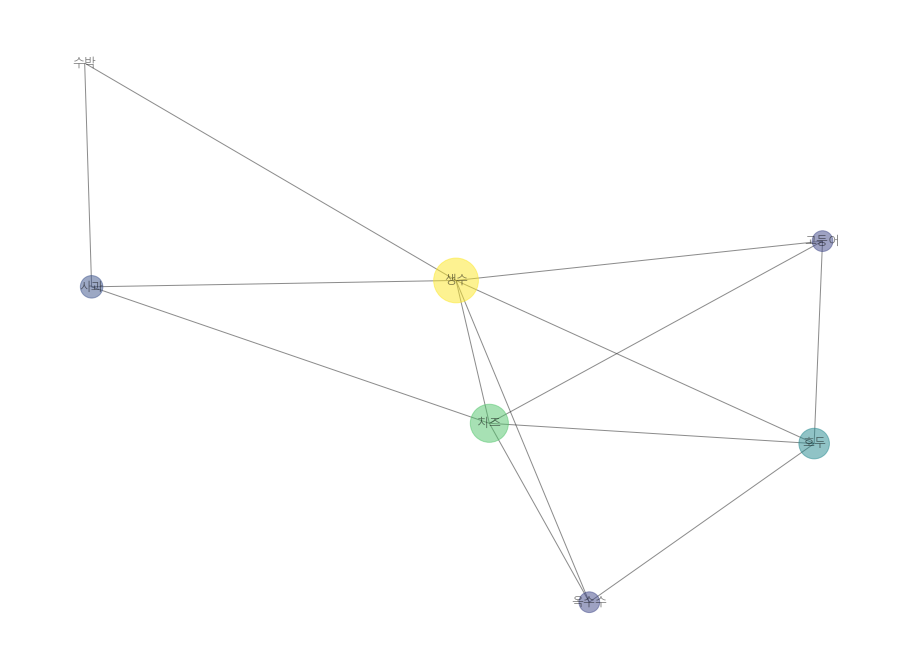

In [144]:
plt.figure(figsize=(16,12))
plt.axis('off')
nx.draw_networkx(G, 
                 font_family='Malgun Gothic', 
                 node_size=nsize,
                 node_color=list(pr.values()),
                 alpha=0.5,
                 edge_color='0.1')
plt.show()